**Import the following playlists from the Spotify API:**

(Imported on 10/24/2021)

-Global Top 50

-USA Top 50

-Canada Top 50

-Australia Top 50

-Ireland Top 50

-UK Top 50

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from math import pi
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
%matplotlib inline

In [2]:
#add the playlists from the stored Data file
globalTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Global-Top-50.csv', 
                        sep = ',', error_bad_lines = False, index_col = False)
usaTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\USA-Top-50.csv', 
                     sep = ',', error_bad_lines = False, index_col = False)
australiaTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Australia-Top-50.csv', 
                           sep = ',', error_bad_lines = False, index_col = False)
canadaTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Canada-Top-50.csv', 
                        sep = ',', error_bad_lines = False, index_col = False)
irelandTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\Ireland-Top-50.csv', 
                         sep = ',', error_bad_lines = False, index_col = False)
ukTop = pd.read_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\UK-Top-50.csv', 
                    sep = ',', error_bad_lines = False, index_col = False)

In [3]:
#combine the dataframes into one dataframe
allTracks_df = pd.concat([globalTop,usaTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,australiaTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,canadaTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,irelandTop]).drop_duplicates().reset_index(drop=True)
allTracks_df = pd.concat([allTracks_df,ukTop]).drop_duplicates().reset_index(drop=True)
allTracks_df.head()

,Name,Album,Artist,Release Date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Valence
0,Easy On Me,Easy On Me,Adele,2021-10-14,224694,100,0.5780,0.604,0.366,0.000000,0.1330,-7.519,0.0282,141.981,4,0.130
1,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,141805,93,0.0383,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,4,0.478
2,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17,212352,91,0.0221,0.741,0.691,0.000000,0.0476,-7.395,0.0672,150.087,4,0.892
3,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,238805,92,0.4400,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,4,0.531
4,MONEY,LALISA,LISA,2021-09-10,168227,93,0.1610,0.831,0.554,0.000061,0.1520,-9.998,0.2180,140.026,4,0.396


In [4]:
#Add columns to indicate if a track was listed in each of the playlists
allTracks_df['Global'] = allTracks_df['Name'].isin(globalTop['Name'].tolist()).astype(int)
allTracks_df['USA'] = allTracks_df['Name'].isin(usaTop['Name'].tolist()).astype(int)
allTracks_df['Australia'] = allTracks_df['Name'].isin(australiaTop['Name'].tolist()).astype(int)
allTracks_df['Canada'] = allTracks_df['Name'].isin(canadaTop['Name'].tolist()).astype(int)
allTracks_df['Ireland'] = allTracks_df['Name'].isin(irelandTop['Name'].tolist()).astype(int)
allTracks_df['UK'] = allTracks_df['Name'].isin(ukTop['Name'].tolist()).astype(int)
allTracks_df.to_csv(r'C:\\Users\\Jessica\\Spot50-Data-Analysis\\Data\\CompiledPlaylists.csv', index = False)
allTracks_df.head()

,Name,Album,Artist,Release Date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,...,Speechiness,Tempo,Time Signature,Valence,Global,USA,Australia,Canada,Ireland,UK
0,Easy On Me,Easy On Me,Adele,2021-10-14,224694,100,0.5780,0.604,0.366,0.000000,...,0.0282,141.981,4,0.130,1,1,1,1,1,1
1,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,2021-07-23,141805,93,0.0383,0.591,0.764,0.000000,...,0.0483,169.928,4,0.478,1,1,1,1,1,1
2,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17,212352,91,0.0221,0.741,0.691,0.000000,...,0.0672,150.087,4,0.892,1,1,1,1,1,1
3,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals,2020-08-06,238805,92,0.4400,0.761,0.525,0.000007,...,0.0944,80.870,4,0.531,1,1,1,1,1,1
4,MONEY,LALISA,LISA,2021-09-10,168227,93,0.1610,0.831,0.554,0.000061,...,0.2180,140.026,4,0.396,1,1,1,1,0,1


In [5]:
#Format the Release Date column for analysis
allTracks_df['Release Date'] = pd.to_datetime(allTracks_df['Release Date'],format='%Y-%m-%d')
#check for null values and data types in each column
allTracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              106 non-null    object        
 1   Album             106 non-null    object        
 2   Artist            106 non-null    object        
 3   Release Date      106 non-null    datetime64[ns]
 4   Length            106 non-null    int64         
 5   Popularity        106 non-null    int64         
 6   Acousticness      106 non-null    float64       
 7   Danceability      106 non-null    float64       
 8   Energy            106 non-null    float64       
 9   Instrumentalness  106 non-null    float64       
 10  Liveness          106 non-null    float64       
 11  Loudness          106 non-null    float64       
 12  Speechiness       106 non-null    float64       
 13  Tempo             106 non-null    float64       
 14  Time Signature    106 non-

In [6]:
def find_max(df, category):

    '''

    FUNCTION: Determine the song in a list with the highest value for a
              particular audio feature
    INPUTS: df - dataframe containing songs and their audio features
            category - which audio feature to rank the songs by
    OUTPUT: Track title and Artist
    
    '''

    track = df[df[category] == np.max(df[category])]
    title = track.iloc[0]['Name']
    artist = track.iloc[0]['Artist']

    max = title + ' by ' + artist

    return max

In [7]:
#Check the max value of each category
print('The song with the maximum track length: ' + find_max(allTracks_df,'Length'))
print('The song with the maximum popularity: ' + find_max(allTracks_df,'Popularity'))
print('The song with the maximum acousticness: ' + find_max(allTracks_df,'Acousticness'))
print('The song with the maximum danceability: ' + find_max(allTracks_df,'Danceability'))
print('The song with the maximum energy: ' + find_max(allTracks_df,'Energy'))
print('The song with the maximum instrumentalness: ' + find_max(allTracks_df,'Instrumentalness'))
print('The song with the maximum liveness: ' + find_max(allTracks_df,'Liveness'))
print('The song with the maximum loudness: ' + find_max(allTracks_df,'Loudness'))
print('The song with the maximum speechiness: ' + find_max(allTracks_df,'Speechiness'))
print('The song with the maximum valence: ' + find_max(allTracks_df, 'Valence'))

The song with the maximum track length: Happier Than Ever by Billie Eilish
The song with the maximum popularity: Easy On Me by Adele
The song with the maximum acousticness: Make You Feel My Love by Adele
The song with the maximum danceability: In Da Getto by J Balvin
The song with the maximum energy: Love Tonight - David Guetta Remix Edit by Shouse
The song with the maximum instrumentalness: Tell Me Something Good by Ewan McVicar
The song with the maximum liveness: Peaches (feat. Daniel Caesar & Giveon) by Justin Bieber
The song with the maximum loudness: Shivers by Ed Sheeran
The song with the maximum speechiness: Alone With You by Arz
The song with the maximum valence: Dreams by Jolyon Petch


In [8]:
allTracks_df.describe()

,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Valence,Global,USA,Australia,Canada,Ireland,UK
count,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,199960.801887,83.575472,0.205999,0.682774,0.654443,1.864460e-02,0.152057,-6.001575,0.102858,122.023708,3.924528,0.502981,0.471698,0.471698,0.471698,0.471698,0.471698,0.471698
std,43839.386739,10.853087,0.228609,0.135134,0.162977,1.078451e-01,0.092198,2.012844,0.106963,28.545261,0.357188,0.237293,0.501570,0.501570,0.501570,0.501570,0.501570,0.501570
min,108650.000000,41.000000,0.000222,0.317000,0.172000,0.000000e+00,0.026000,-12.490000,0.024900,65.180000,1.000000,0.034800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162622.250000,79.000000,0.016725,0.603000,0.538250,0.000000e+00,0.092725,-7.066750,0.037350,100.953250,4.000000,0.337000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199822.000000,86.000000,0.119500,0.712500,0.670500,8.150000e-07,0.116000,-5.862500,0.056300,123.985500,4.000000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,227732.750000,91.000000,0.319500,0.780750,0.782500,7.182500e-05,0.182750,-4.494250,0.118750,140.771500,4.000000,0.687250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,298899.000000,100.000000,0.907000,0.924000,0.989000,9.210000e-01,0.420000,-2.724000,0.723000,200.156000,4.000000,0.961000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


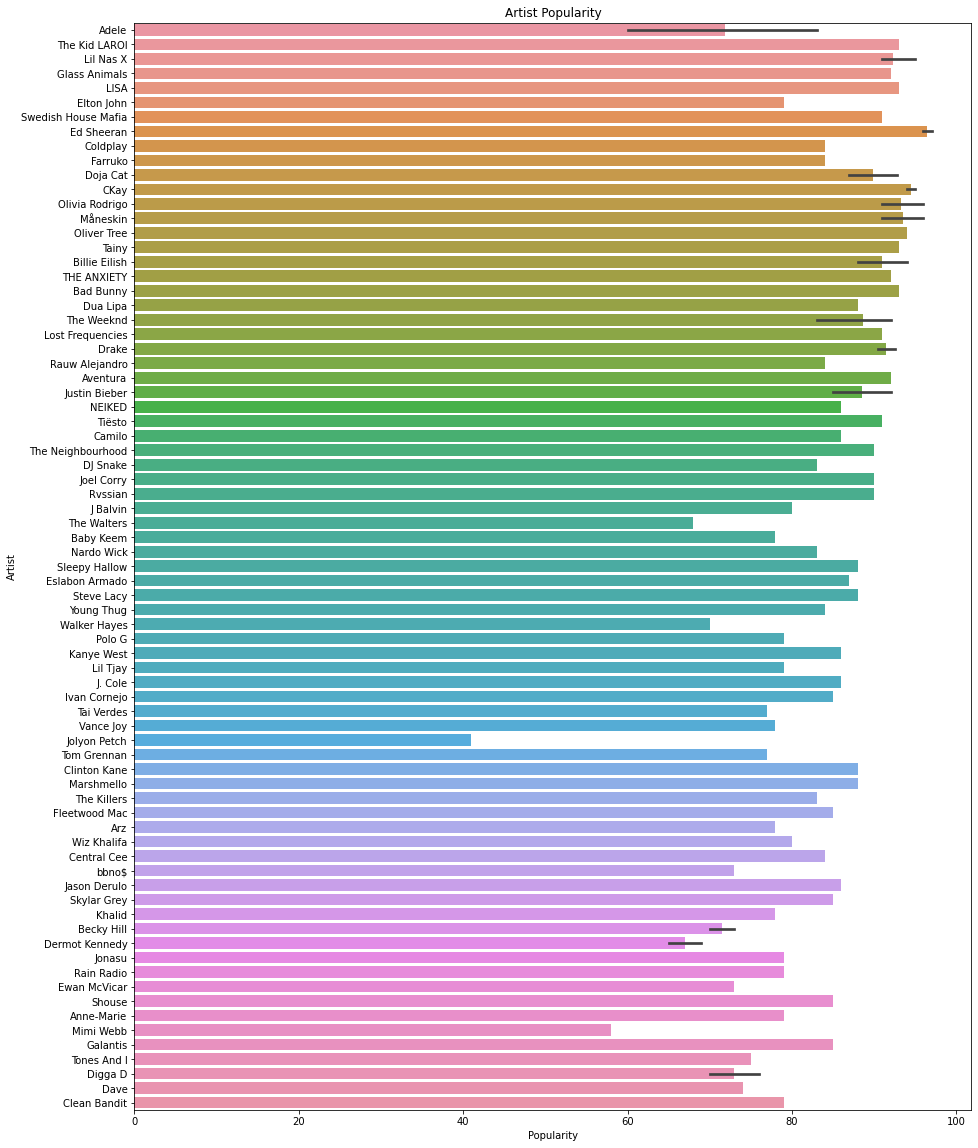

In [9]:
fig, ax = plt.subplots(figsize=(15,20)) 
plt.title('Artist Popularity')
sns.barplot(x=allTracks_df['Popularity'], y=allTracks_df['Artist'], ax=ax)
plt.show()
fig.savefig(r'C:\Users\Jessica\Spot50-Data-Analysis\Images\ArtistPopularity.png')

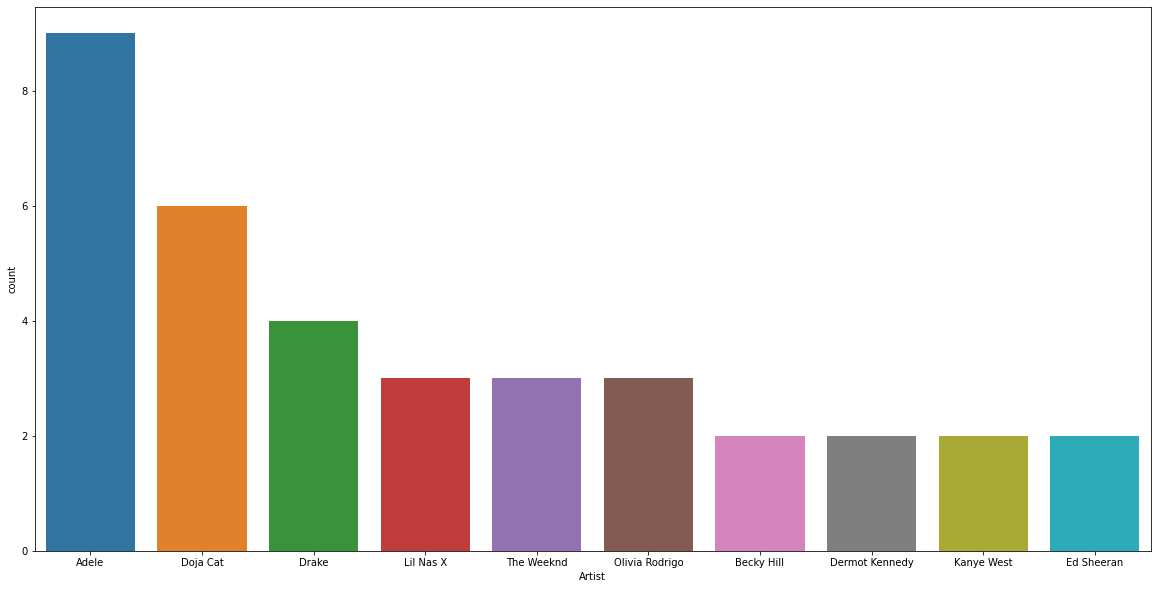

In [10]:
#Show the 10 artists with the most songs in the track list
fig, ax = plt.subplots(figsize=(20,10)) 
sns.countplot(x = 'Artist', data = allTracks_df, order = allTracks_df['Artist'].value_counts().iloc[:10].index, ax=ax)
plt.show()
fig.savefig(r'C:\Users\Jessica\Spot50-Data-Analysis\Images\CountByArtist.png')

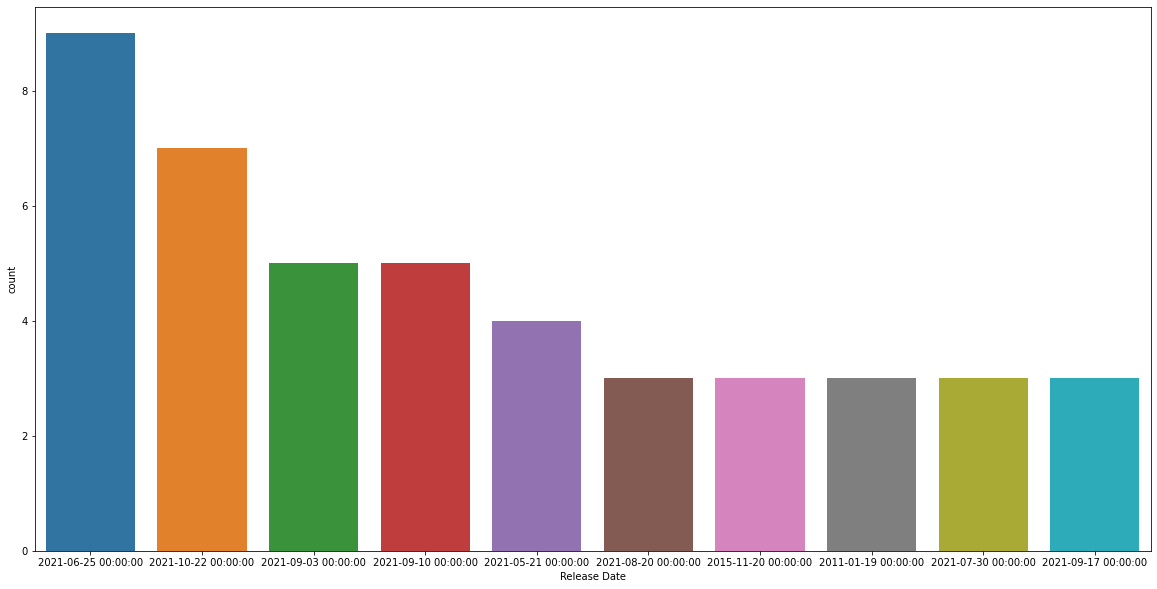

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x = 'Release Date', data = allTracks_df, order = allTracks_df['Release Date'].value_counts().iloc[:10].index, )
plt.show()
fig.savefig(r'C:\Users\Jessica\Spot50-Data-Analysis\Images\CountByReleaseDate.png')

C:\Users\Jessica\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


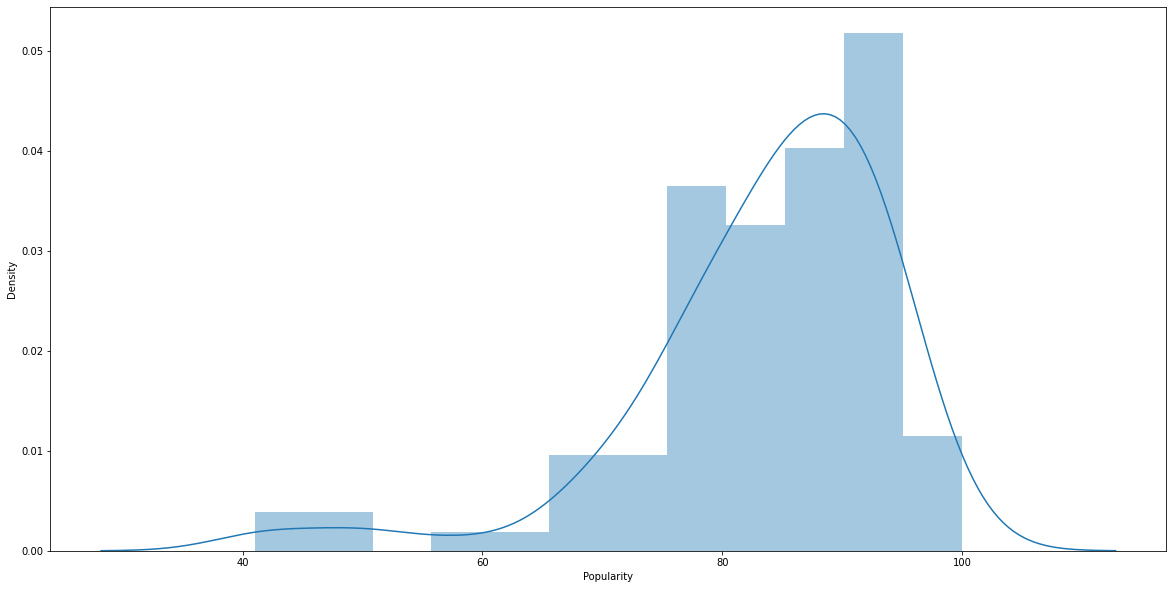

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(allTracks_df.Popularity)
plt.show()
fig.savefig(r'C:\Users\Jessica\Spot50-Data-Analysis\Images\DistributionDensity.png')

In [13]:
#need to rescale length, popularity, loudness, tempo, time signature
#drop country, dummy variables, name, album, artist, and release date
all_features = allTracks_df.copy()
all_features.drop(['Global','USA','Australia','Canada','Ireland','UK','Name','Artist','Album','Release Date'],axis=1, inplace=True)
all_features.head()

,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Valence
0,224694,100,0.5780,0.604,0.366,0.000000,0.1330,-7.519,0.0282,141.981,4,0.130
1,141805,93,0.0383,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,4,0.478
2,212352,91,0.0221,0.741,0.691,0.000000,0.0476,-7.395,0.0672,150.087,4,0.892
3,238805,92,0.4400,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,4,0.531
4,168227,93,0.1610,0.831,0.554,0.000061,0.1520,-9.998,0.2180,140.026,4,0.396


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names = all_features.columns.tolist()
all_features[col_names] = scaler.fit_transform(all_features[col_names])
all_features

,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Valence
0,0.609959,1.000000,0.637177,0.472817,0.237454,0.000000,0.271574,0.509011,0.004727,0.568997,1.0,0.102786
1,0.174272,0.881356,0.041993,0.451400,0.724602,0.000000,0.195431,0.717387,0.033520,0.776049,1.0,0.478514
2,0.545086,0.847458,0.024127,0.698517,0.635251,0.000000,0.054822,0.521708,0.060593,0.629053,1.0,0.925502
3,0.684130,0.864407,0.484990,0.731466,0.432069,0.000007,0.167766,0.572394,0.099556,0.116243,1.0,0.535737
4,0.313153,0.881356,0.177307,0.846787,0.467564,0.000066,0.319797,0.255171,0.276608,0.554513,1.0,0.389981
...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.535383,0.593220,0.320672,0.492586,0.364749,0.000000,0.215736,0.655130,0.000573,0.110020,1.0,0.313323
102,0.336438,0.491525,0.551158,0.698517,0.556916,0.000000,0.697970,0.421667,0.472855,0.592616,1.0,0.785144
103,0.752083,0.559322,0.344933,0.912685,0.424725,0.000009,0.154569,0.608335,0.333906,0.554417,1.0,0.536817
104,0.346362,0.593220,0.191643,0.734761,0.604651,0.000000,0.208122,0.168544,0.478585,0.576547,1.0,0.707407


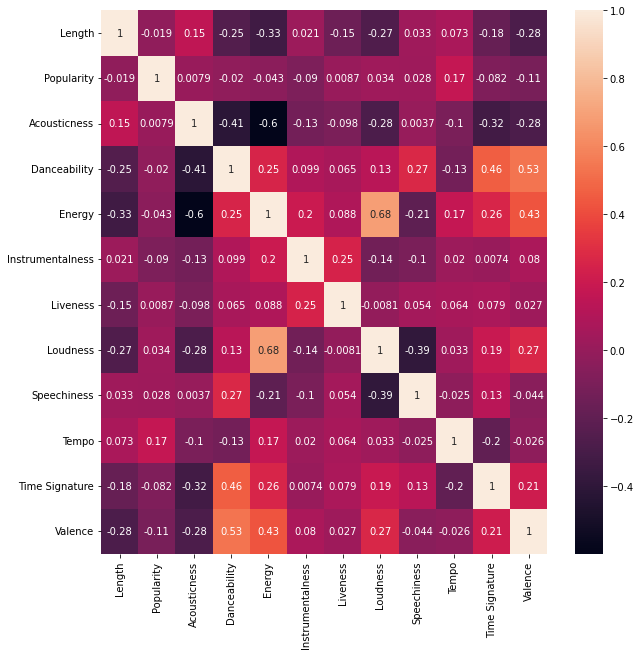

In [15]:
corr = all_features.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True, ax=ax)
plt.show()
fig.savefig(r'C:\Users\Jessica\Spot50-Data-Analysis\Images\FeaturesHeatMap.png')

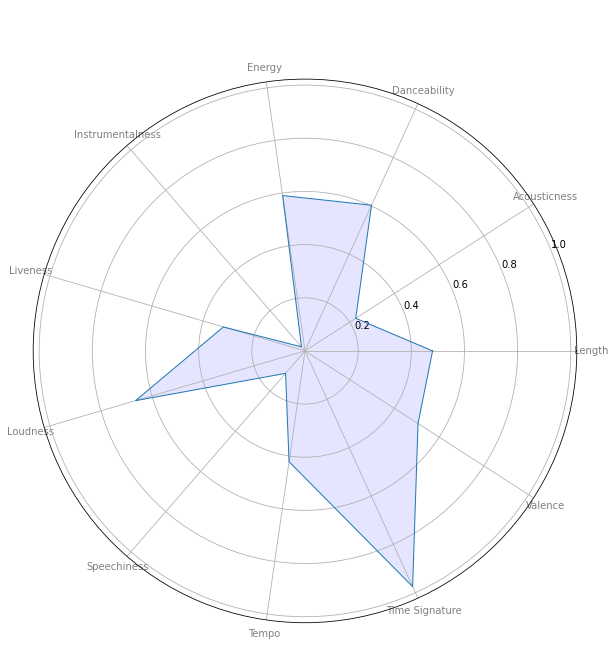

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
features = ['Length','Acousticness','Danceability','Energy','Instrumentalness',
            'Liveness','Loudness','Speechiness','Tempo','Time Signature',
            'Valence']
    
# number of variable
N=len(features)
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

feature_val = list()
for vals in features:
    feature_val.append(all_features[vals].mean())
feature_val.append(all_features[features[0]].mean())

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(1, 1, 1, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], features, color='grey', size=10)
    
plt.subplots_adjust(hspace = 0.5)
    
# Plot data
ax.plot(angles, feature_val, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, feature_val, 'b', alpha=0.1)

plt.title('Audio Features', color = 'white', size=16, y=1.1)

plt.show()
fig.savefig(r'C:\Users\Jessica\Spot50-Data-Analysis\Images\star.png')

In [17]:
#split features data into train and test data sets
y = all_features['Popularity']
X = all_features.drop(['Popularity'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33,random_state=42)

In [29]:
#Set up the Lasso Regression Analysis
model = Lasso(alpha=1)
model.fit(X_train, y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.134 (0.032)


In [30]:
#Set up Ridge Regression Analysis
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.119 (0.032)


In [31]:
#Set up RFE Analysis
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -0.165 (0.040)


In [32]:
#XGB Regression Analysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.134 (0.038)


In [33]:
from sklearn.model_selection import GridSearchCV
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.119
Config: {'alpha': 0.99}


In [34]:
from sklearn.linear_model import RidgeCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

alpha: 0.990000


In [35]:
y_pred = model.predict(X_valid)
y_pred

array([0.74109161, 0.72058504, 0.73444654, 0.6891882 , 0.75275666,
       0.71972226, 0.79227227, 0.72854647, 0.7527323 , 0.68761402,
       0.73269638, 0.78570279, 0.79341692, 0.68831472, 0.69580049,
       0.70478632, 0.6346273 , 0.7647091 , 0.72103316, 0.743204  ,
       0.71507137, 0.71843012, 0.7600823 , 0.68624537, 0.70852543,
       0.76751882, 0.7488865 , 0.79437355, 0.75183365, 0.71586822,
       0.70801221, 0.73438524, 0.77991648, 0.82495429, 0.7362076 ])